In [7]:
pip install missingno

Note: you may need to restart the kernel to use updated packages.


In [8]:
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import time
import operator
from colorama import Fore, init
import plotly.express as px


import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.sentiment import SentimentIntensityAnalyzer
from nltk import tokenize
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize
from tqdm.notebook import tqdm
from collections import Counter
from wordcloud import WordCloud

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import make_pipeline
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_predict

nltk.download('vader_lexicon')
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')


import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\aakas\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\aakas\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\aakas\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\aakas\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [9]:
df=pd.read_csv("C:/Users/aakas/OneDrive/Desktop/data science/archive/McDonald_s_Reviews.csv",encoding='latin1')
df.head()

,reviewer_id,store_name,category,store_address,latitude,longitude,rating_count,review_time,review,rating
0,1,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",3 months ago,Why does it look like someone spit on my food?...,1 star
1,2,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",5 days ago,It'd McDonalds. It is what it is as far as the...,4 stars
2,3,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",5 days ago,Made a mobile order got to the speaker and che...,1 star
3,4,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",a month ago,My mc. Crispy chicken sandwich was ¨«¨«¨«¨...,5 stars
4,5,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",2 months ago,"I repeat my order 3 times in the drive thru, a...",1 star


In [10]:
df.isnull().sum()

reviewer_id        0
store_name         0
category           0
store_address      0
latitude         660
longitude        660
rating_count       0
review_time        0
review             0
rating             0
dtype: int64

In [11]:
df.dropna()

,reviewer_id,store_name,category,store_address,latitude,longitude,rating_count,review_time,review,rating
0,1,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",3 months ago,Why does it look like someone spit on my food?...,1 star
1,2,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",5 days ago,It'd McDonalds. It is what it is as far as the...,4 stars
2,3,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",5 days ago,Made a mobile order got to the speaker and che...,1 star
3,4,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",a month ago,My mc. Crispy chicken sandwich was ¨«¨«¨«¨...,5 stars
4,5,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",2 months ago,"I repeat my order 3 times in the drive thru, a...",1 star
...,...,...,...,...,...,...,...,...,...,...
33391,33392,McDonald's,Fast food restaurant,"3501 Biscayne Blvd, Miami, FL 33137, United St...",25.810000,-80.189098,"2,810",4 years ago,They treated me very badly.,1 star
33392,33393,McDonald's,Fast food restaurant,"3501 Biscayne Blvd, Miami, FL 33137, United St...",25.810000,-80.189098,"2,810",a year ago,The service is very good,5 stars
33393,33394,McDonald's,Fast food restaurant,"3501 Biscayne Blvd, Miami, FL 33137, United St...",25.810000,-80.189098,"2,810",a year ago,To remove hunger is enough,4 stars
33394,33395,McDonald's,Fast food restaurant,"3501 Biscayne Blvd, Miami, FL 33137, United St...",25.810000,-80.189098,"2,810",5 years ago,"It's good, but lately it has become very expen...",5 stars


In [12]:
df.isnull().sum()

reviewer_id        0
store_name         0
category           0
store_address      0
latitude         660
longitude        660
rating_count       0
review_time        0
review             0
rating             0
dtype: int64

In [13]:
df.duplicated().sum()

0

In [14]:
df.columns

Index(['reviewer_id', 'store_name', 'category', 'store_address', 'latitude ',
       'longitude', 'rating_count', 'review_time', 'review', 'rating'],
      dtype='object')

In [15]:
len(df['reviewer_id'].unique())

33396

In [16]:
for column in df.columns:
    num_distinct_values = len(df[column].unique())
    print(f"{column}: {num_distinct_values} distinct values")

reviewer_id: 33396 distinct values
store_name: 2 distinct values
category: 1 distinct values
store_address: 40 distinct values
latitude : 40 distinct values
longitude: 40 distinct values
rating_count: 51 distinct values
review_time: 39 distinct values
review: 22285 distinct values
rating: 5 distinct values


In [17]:
df = df.dropna()

In [18]:
df1 = df.copy()

In [19]:
df1 = df1.drop(columns=['reviewer_id','store_name', 'category', 'latitude ', 'longitude', 'rating_count'])

In [20]:
df1.head()

,store_address,review_time,review,rating
0,"13749 US-183 Hwy, Austin, TX 78750, United States",3 months ago,Why does it look like someone spit on my food?...,1 star
1,"13749 US-183 Hwy, Austin, TX 78750, United States",5 days ago,It'd McDonalds. It is what it is as far as the...,4 stars
2,"13749 US-183 Hwy, Austin, TX 78750, United States",5 days ago,Made a mobile order got to the speaker and che...,1 star
3,"13749 US-183 Hwy, Austin, TX 78750, United States",a month ago,My mc. Crispy chicken sandwich was ¨«¨«¨«¨...,5 stars
4,"13749 US-183 Hwy, Austin, TX 78750, United States",2 months ago,"I repeat my order 3 times in the drive thru, a...",1 star


In [21]:
df1[['City', 'State']] = df1['store_address'].apply(lambda x: pd.Series(x.split(', ')[-3:-1]))

In [22]:
df1[['City','State']].head()

,City,State
0,Austin,TX 78750
1,Austin,TX 78750
2,Austin,TX 78750
3,Austin,TX 78750
4,Austin,TX 78750


In [23]:
df1 = df1.drop(columns=['store_address'])

In [24]:
df1.insert(5, "Star", df1["rating"].str.split(" ").str[0])
df1.head()

,review_time,review,rating,City,State,Star
0,3 months ago,Why does it look like someone spit on my food?...,1 star,Austin,TX 78750,1
1,5 days ago,It'd McDonalds. It is what it is as far as the...,4 stars,Austin,TX 78750,4
2,5 days ago,Made a mobile order got to the speaker and che...,1 star,Austin,TX 78750,1
3,a month ago,My mc. Crispy chicken sandwich was ¨«¨«¨«¨...,5 stars,Austin,TX 78750,5
4,2 months ago,"I repeat my order 3 times in the drive thru, a...",1 star,Austin,TX 78750,1


In [25]:
def clean_review(review):
    review = review.lower()
    review = re.sub(r'[^a-zA-Z\s]', '', review)
    review = re.sub(r'\s+', ' ', review).strip()

    stop_words = set(stopwords.words('english'))
    review_tokens = nltk.word_tokenize(review)
    review = ' '.join([word for word in review_tokens if word not in stop_words])

   
    return review

df1['clean_reviews'] = df1['review'].apply(clean_review)

print(df1[['clean_reviews']])

                                           clean_reviews
0      look like someone spit food normal transaction...
1      itd mcdonalds far food atmosphere go staff mak...
2      made mobile order got speaker checked line mov...
3      mc crispy chicken sandwich customer service qu...
4      repeat order times drive thru still manage mes...
...                                                  ...
33391                                      treated badly
33392                                       service good
33393                               remove hunger enough
33394                       good lately become expensive
33395                                     took good care

[32736 rows x 1 columns]


In [26]:
df1 = df1.drop(columns=['review'])

In [27]:
pip install colorama

Note: you may need to restart the kernel to use updated packages.


In [28]:
from colorama import Fore


In [29]:
from colorama import Fore

specified_columns = ['City', 'State', 'review_time', 'Star']

for col in specified_columns:
    total_unique_values = df1[col].nunique()
    print(f'Total unique values for {col}: {total_unique_values}')

    top_values = df1[col].value_counts()

    colors = [Fore.RED, Fore.GREEN, Fore.YELLOW, Fore.BLUE, Fore.MAGENTA, Fore.CYAN, Fore.WHITE, Fore.LIGHTBLACK_EX, Fore.LIGHTRED_EX, Fore.LIGHTGREEN_EX]

    for i, (value, count) in enumerate(top_values.items()):
        color = colors[i % len(colors)]
        print(f'{color}{value}: {count}{Fore.RESET}')

    print('\n' + '=' * 30 + '\n')


Total unique values for City: 26
New York: 3486
Orlando: 3090
Austin: 1726
Kissimmee: 1720
North Hollywood: 1710
Fern Park: 1700
Dallas: 1650
Miami: 1570
Newark: 1290
San Diego: 1230
Roanoke: 1168
Queens: 1140
Los Angeles: 1034
Las Vegas: 1030
Brodheadsville: 1028
Voorhees Township: 943
Salt Lake City: 890
Fort Worth: 850
Santa Monica: 820
Sunnyvale: 800
Oak Park: 751
Washington: 683
San Antonio: 635
Champlain: 620
Annandale: 602
Miami Beach: 570


Total unique values for State: 36
FL 32819: 2380
NY 10001: 2070
FL 34746: 1720
CA 91602: 1710
FL 32730: 1700
TX 75203: 1650
FL 33137: 1570
NJ 07104: 1290
TX 76262: 1168
NY 11367: 1140
NY 10003: 1140
NV 89119: 1030
PA 18322: 1028
NJ 08043: 943
TX 78724: 926
UT 84106: 890
TX 76177: 850
CA 90405: 820
TX 78750: 800
CA 94086: 800
IL 60302: 751
FL 32837: 710
DC 20036: 680
CA 92109: 680
TX 78257: 635
NY 12919: 620
VA 22003: 602
FL 33139: 570
CA 90021: 550
CA 92111: 550
CA 90044: 481
NY 10013: 270
NY 10002: 3
CA 90025: 3
DC 20004: 3
NY 10038: 3


To

In [30]:
df2 = df1.copy()

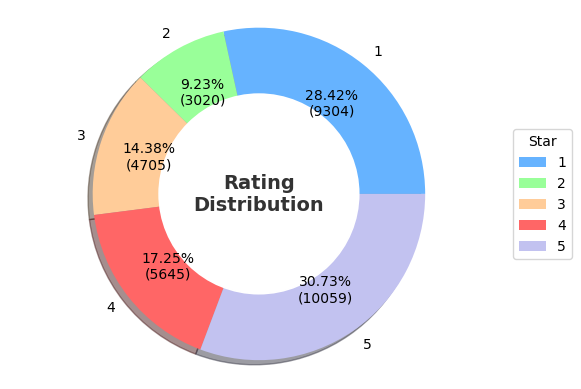

In [31]:
unique_star = df1['Star'].unique()

explode = [0] * len(unique_star)

sentiment_counts = df2.groupby("Star").size()

colors = ['#66b3ff', '#99ff99', '#ffcc99', '#ff6666', '#c2c2f0']  

fig, ax = plt.subplots()

wedges, texts, autotexts = ax.pie(
    x=sentiment_counts, 
    labels=sentiment_counts.index,
    autopct=lambda p: f'{p:.2f}%\n({int(p*sum(sentiment_counts)/100)})', 
    wedgeprops=dict(width=0.7),
    textprops=dict(size=10, color="black"),  
    pctdistance=0.7,
    colors=colors,
    explode=explode,  
    shadow=True
)

center_circle = plt.Circle((0, 0), 0.6, color='white', fc='white', linewidth=1.25)
fig.gca().add_artist(center_circle)

ax.text(0, 0, 'Rating\nDistribution', ha='center', va='center', fontsize=14, fontweight='bold', color='#333333')

ax.legend(sentiment_counts.index, title="Star", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

ax.axis('equal')  

plt.show()

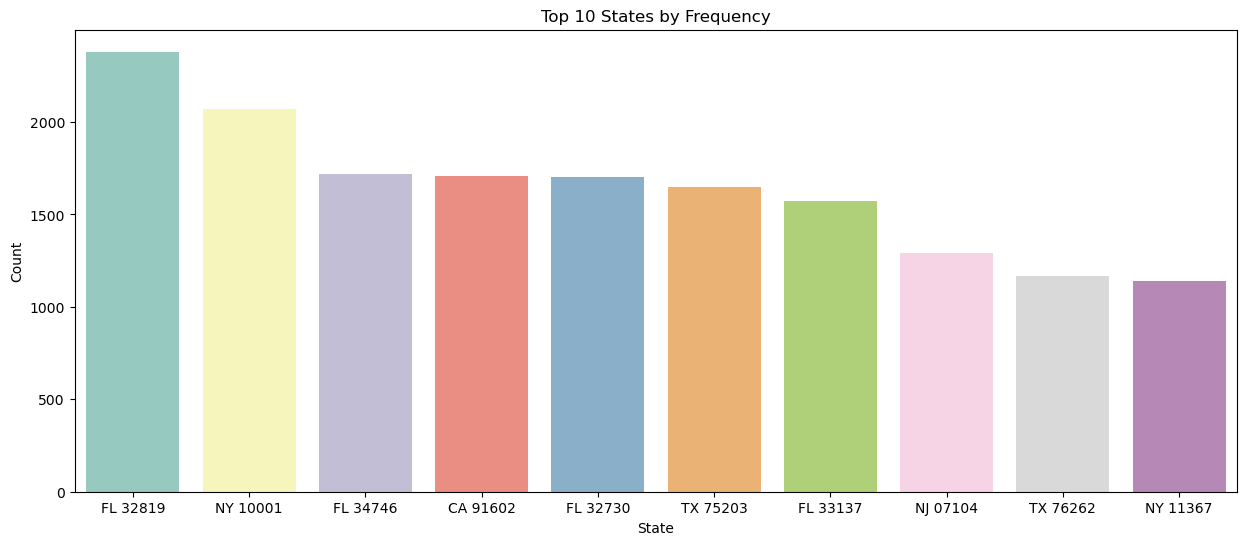

In [32]:
top_10_states = df2['State'].value_counts().nlargest(10)

plt.figure(figsize=(15, 6))
sns.set_palette("Set3")  
sns.countplot(x='State', data=df2, order=top_10_states.index)
plt.title('Top 10 States by Frequency')
plt.xlabel('State')
plt.ylabel('Count')
plt.show()

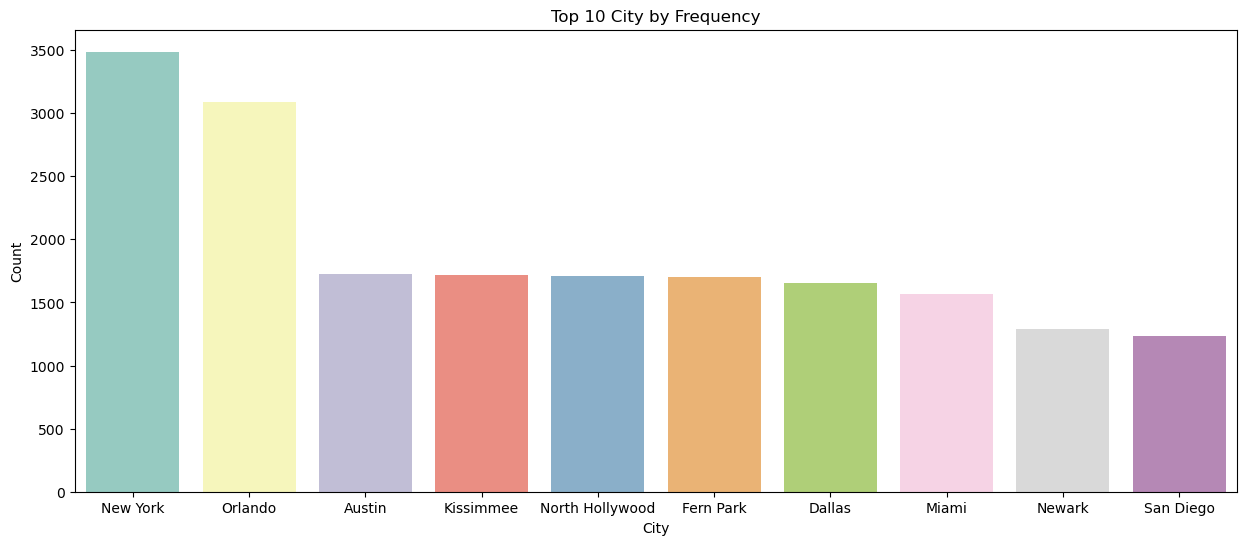

In [33]:
top_10_city = df2['City'].value_counts().nlargest(10)

plt.figure(figsize=(15, 6))
sns.set_palette("Set3")  
sns.countplot(x='City', data=df2, order=top_10_city.index)
plt.title('Top 10 City by Frequency')
plt.xlabel('City')
plt.ylabel('Count')
plt.show()

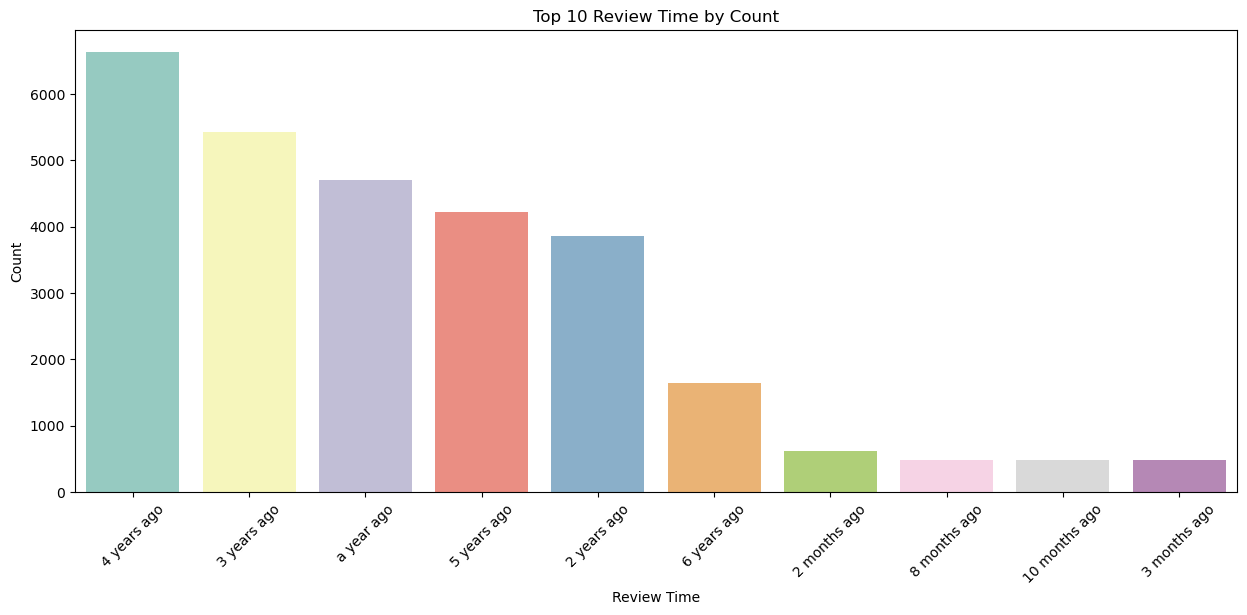

In [34]:
plt.figure(figsize=(15, 6))
sns.set_palette("Set3")
sns.countplot(x='review_time', data=df2, order=df2['review_time'].value_counts().iloc[:10].index)
plt.title('Top 10 Review Time by Count')
plt.xlabel('Review Time')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

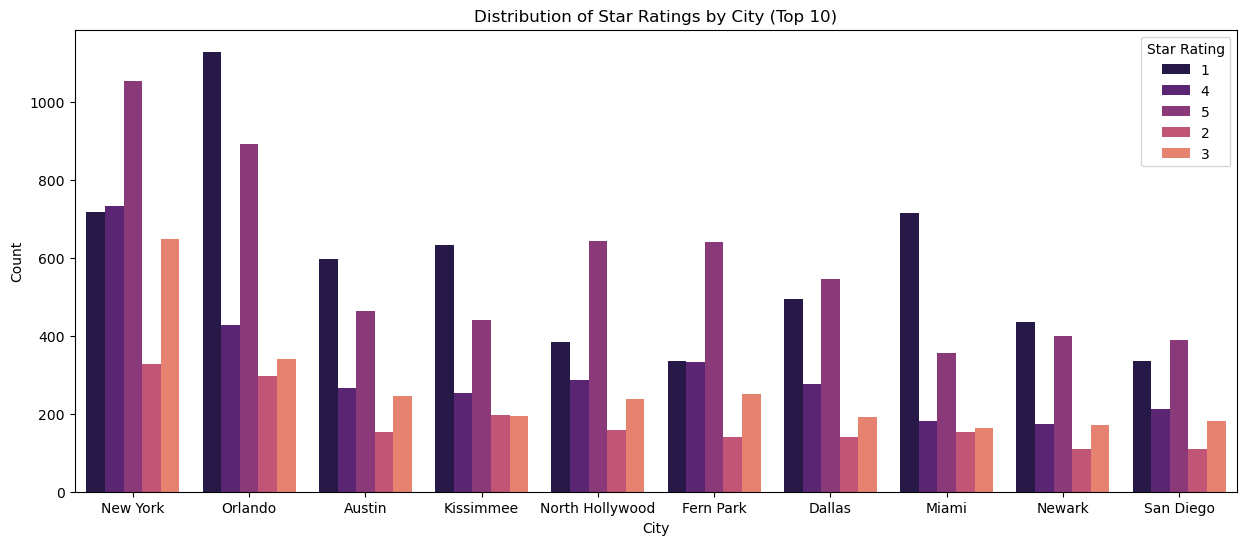

In [35]:
plt.figure(figsize=(15, 6))
sns.set_palette("magma") 
sns.countplot(x='City', hue='Star', data=df2, order=df2['City'].value_counts().iloc[:10].index)
plt.title('Distribution of Star Ratings by City (Top 10)')
plt.xlabel('City')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Star Rating')
plt.show()

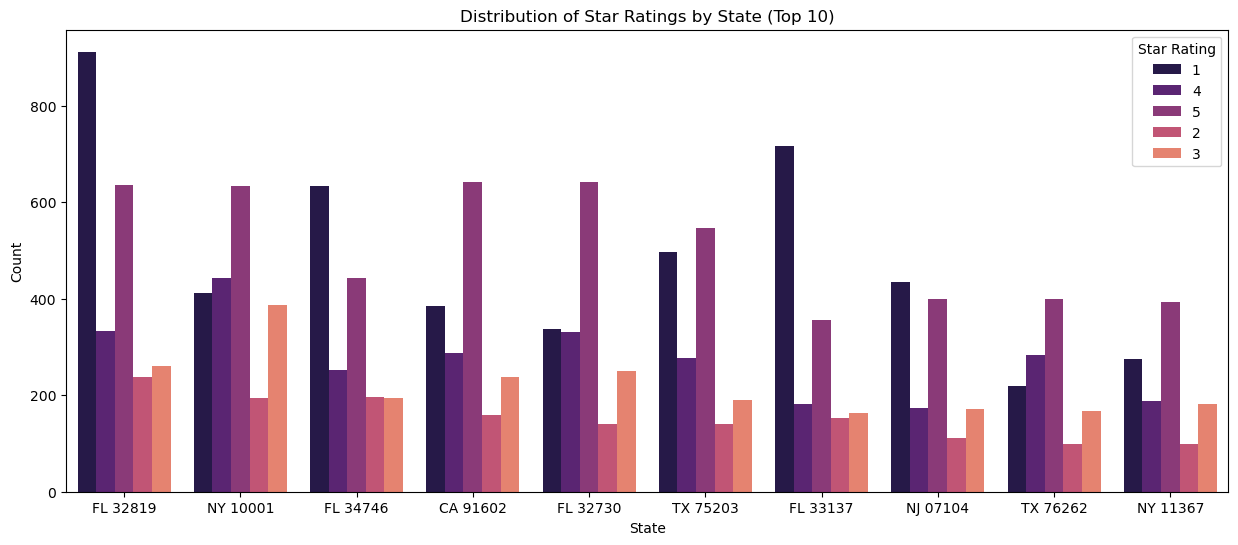

In [36]:
plt.figure(figsize=(15, 6))
sns.set_palette("magma") 
sns.countplot(x='State', hue='Star', data=df2, order=df2['State'].value_counts().iloc[:10].index)
plt.title('Distribution of Star Ratings by State (Top 10)')
plt.xlabel('State')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Star Rating')
plt.show()

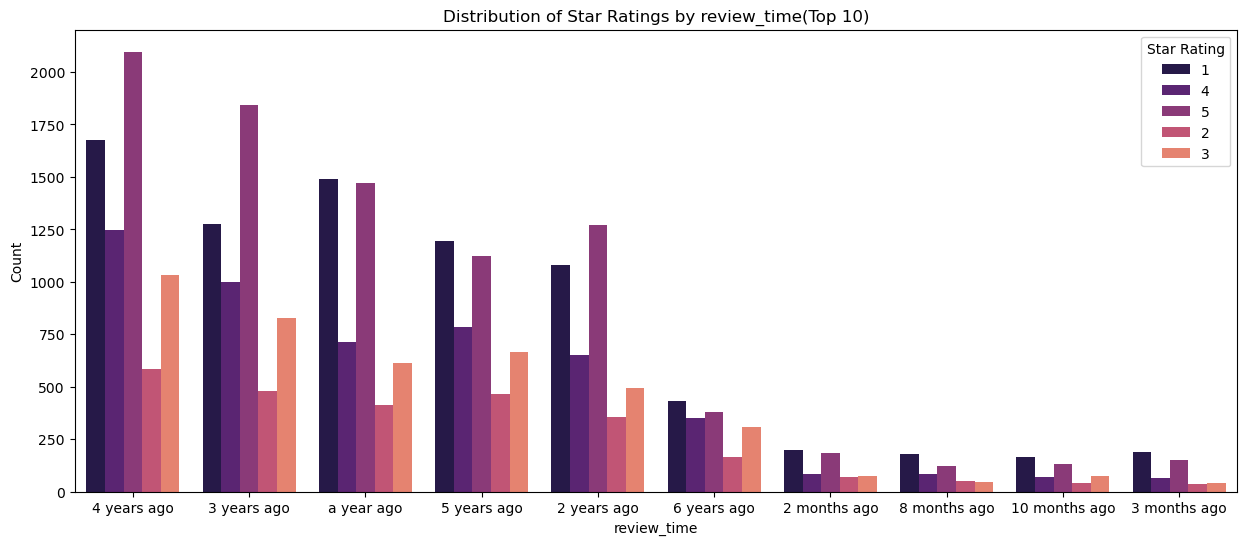

In [37]:
plt.figure(figsize=(15, 6))
sns.set_palette("magma") 
sns.countplot(x='review_time', hue='Star', data=df2, order=df2['review_time'].value_counts().iloc[:10].index)
plt.title('Distribution of Star Ratings by review_time(Top 10)')
plt.xlabel('review_time')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Star Rating')
plt.show()

In [38]:
df3 = df2.copy()

In [39]:
analyzer = SentimentIntensityAnalyzer()

df3['sentiment_score'] = df3['clean_reviews'].apply(lambda text: analyzer.polarity_scores(text)['compound'])

df3['sentiment'] = df3['sentiment_score'].apply(lambda score: 'positive' if score >= 0.05 else ('negative' if score <= -0.05 else 'neutral'))

print(df3[['clean_reviews', 'sentiment_score', 'sentiment']].head())

                                       clean_reviews  sentiment_score  \
0  look like someone spit food normal transaction...           0.5541   
1  itd mcdonalds far food atmosphere go staff mak...           0.8591   
2  made mobile order got speaker checked line mov...          -0.2960   
3  mc crispy chicken sandwich customer service qu...           0.0000   
4  repeat order times drive thru still manage mes...          -0.7184   

  sentiment  
0  positive  
1  positive  
2  negative  
3   neutral  
4  negative  


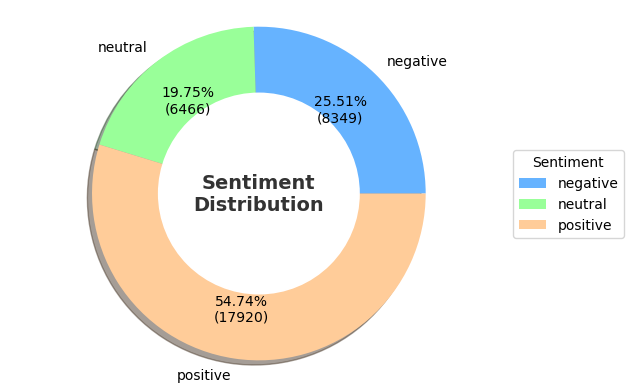

In [40]:
colors = ['#66b3ff', '#99ff99', '#ffcc99']

explode = (0.0, 0, 0)  

sentiment_counts = df3.groupby("sentiment").size()

fig, ax = plt.subplots()

wedges, texts, autotexts = ax.pie(
    x=sentiment_counts, 
    labels=sentiment_counts.index,
    autopct=lambda p: f'{p:.2f}%\n({int(p*sum(sentiment_counts)/100)})', 
    wedgeprops=dict(width=0.7),
    textprops=dict(size=10, color="black"),  
    pctdistance=0.7,
    colors=colors,
    explode=explode,
    shadow=True)

center_circle = plt.Circle((0, 0), 0.6, color='white', fc='white', linewidth=1.25)
fig.gca().add_artist(center_circle)

ax.text(0, 0, 'Sentiment\nDistribution', ha='center', va='center', fontsize=14, fontweight='bold', color='#333333')

ax.legend(sentiment_counts.index, title="Sentiment", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

ax.axis('equal')  

plt.show()

In [41]:
df3["word_count"] = df3['clean_reviews'].str.len()

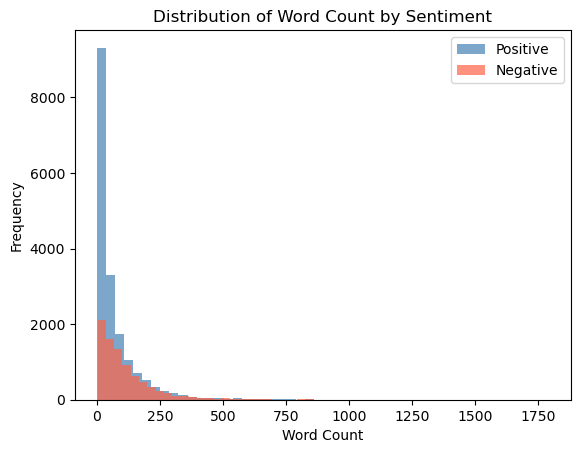

In [42]:

positive_reviews = df3[df3["sentiment"] == 'positive']  
negative_reviews = df3[df3["sentiment"] == 'negative'] 

sns.distplot(positive_reviews['word_count'], color='steelblue', label='Positive', kde=False, hist_kws={'alpha': 0.7})
sns.distplot(negative_reviews['word_count'], color='tomato', label='Negative', kde=False, hist_kws={'alpha': 0.7})

plt.title('Distribution of Word Count by Sentiment')
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.legend()

plt.show()

In [43]:
df3['temp_list'] = df3['clean_reviews'].apply(lambda x: str(x).split())
top_words = Counter([item for sublist in df3['temp_list'] for item in sublist])
top_words_df = pd.DataFrame(top_words.most_common(20), columns=['Common_words', 'count'])

top_words_df.style.background_gradient(cmap='Blues')

,Common_words,count
0,food,7616
1,service,6067
2,order,6030
3,mcdonalds,5977
4,good,5462
5,place,3298
6,get,3248
7,drive,2825
8,one,2657
9,fast,2622


In [44]:
Positive_sent = df3[df3['sentiment'] == 'positive']
Negative_sent = df3[df3['sentiment'] == 'negative']
Neutral_sent = df3[df3['sentiment'] == 'neutral']

In [45]:
from wordcloud import WordCloud

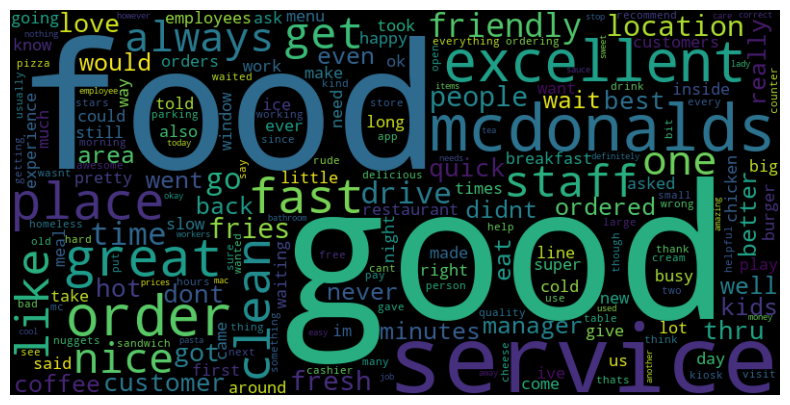

In [46]:
top = Counter([item for sublist in df3[df3['sentiment'] == 'positive']['temp_list'] for item in sublist])
temp_neutral = pd.DataFrame(top.most_common(), columns=['Common_words', 'count'])

wordcloud_data = temp_neutral.set_index('Common_words')['count'].to_dict()

wordcloud = WordCloud(width=800, height=400, background_color='black').generate_from_frequencies(wordcloud_data)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

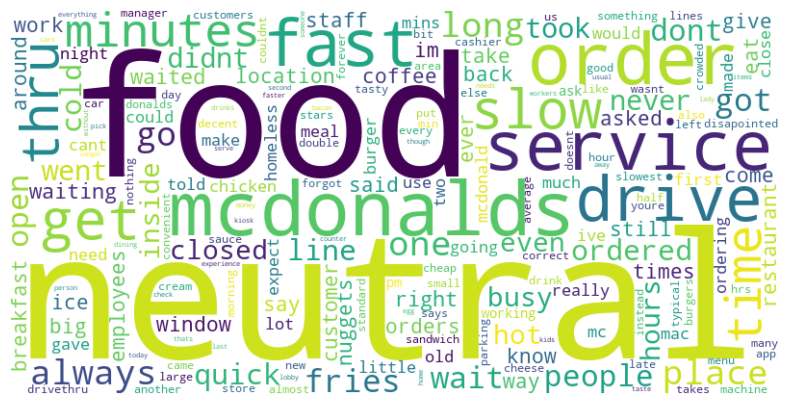

In [47]:
top = Counter([item for sublist in df3[df3['sentiment'] == 'neutral']['temp_list'] for item in sublist])
temp_neutral = pd.DataFrame(top.most_common(), columns=['Common_words', 'count'])

# Create a wordcloud_data dictionary
wordcloud_data = temp_neutral.set_index('Common_words')['count'].to_dict()

# Create and generate a word cloud image
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(wordcloud_data)

# Display the generated image
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

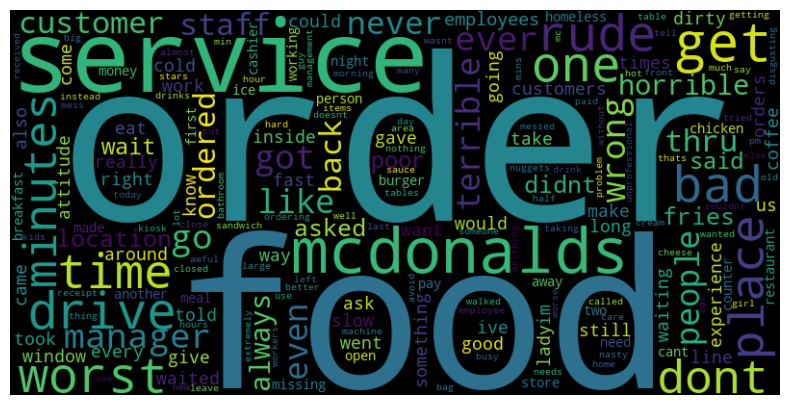

In [48]:
top = Counter([item for sublist in df3[df3['sentiment'] == 'negative']['temp_list'] for item in sublist])
temp_negative = pd.DataFrame(top.most_common(), columns=['Common_words', 'count'])

wordcloud_data = temp_negative.set_index('Common_words')['count'].to_dict()

wordcloud = WordCloud(width=800, height=400, background_color='black').generate_from_frequencies(wordcloud_data)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [49]:
df4 = df3.copy()

In [50]:
X = df4['clean_reviews']
y = df4['sentiment']

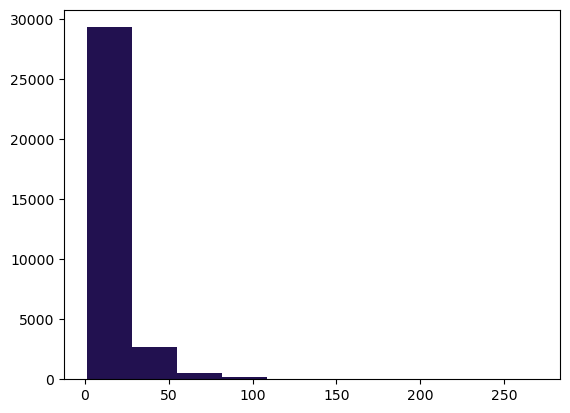

In [51]:
text_lengths = X.apply(lambda x: len(x.split(" ")))
plt.hist(text_lengths)
plt.show()

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [53]:
from sklearn.pipeline import make_pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import PassiveAggressiveClassifier


In [54]:
nb_pipeline = make_pipeline(TfidfVectorizer(), MultinomialNB())
svc_pipeline = make_pipeline(TfidfVectorizer(), SVC())
bernoulli_nb_pipeline = make_pipeline(TfidfVectorizer(), BernoulliNB())
logistic_pipeline = make_pipeline(TfidfVectorizer(), LogisticRegression())
pa_pipeline = make_pipeline(TfidfVectorizer(), PassiveAggressiveClassifier())

In [55]:
nb_pipeline.fit(X_train, y_train)

Pipeline(steps=[('tfidfvectorizer', TfidfVectorizer()),
                ('multinomialnb', MultinomialNB())])

In [56]:
nb_predictions = nb_pipeline.predict(X_test)

In [57]:
print("Multinomial Naive Bayes Classifier:")
print(classification_report(y_test, nb_predictions))

Multinomial Naive Bayes Classifier:
              precision    recall  f1-score   support

    negative       0.83      0.75      0.79      1721
     neutral       0.98      0.22      0.37      1244
    positive       0.73      0.96      0.83      3583

    accuracy                           0.77      6548
   macro avg       0.85      0.65      0.66      6548
weighted avg       0.81      0.77      0.73      6548



In [58]:
svc_pipeline.fit(X_train, y_train)

Pipeline(steps=[('tfidfvectorizer', TfidfVectorizer()), ('svc', SVC())])

In [59]:
svc_predictions = svc_pipeline.predict(X_test)

In [60]:
print("Support Vector Classifier:")
print(classification_report(y_test, svc_predictions))

Support Vector Classifier:
              precision    recall  f1-score   support

    negative       0.90      0.88      0.89      1721
     neutral       0.91      0.91      0.91      1244
    positive       0.95      0.96      0.95      3583

    accuracy                           0.93      6548
   macro avg       0.92      0.92      0.92      6548
weighted avg       0.93      0.93      0.93      6548



In [61]:
bernoulli_nb_pipeline.fit(X_train, y_train)

Pipeline(steps=[('tfidfvectorizer', TfidfVectorizer()),
                ('bernoullinb', BernoulliNB())])

In [62]:
bernoulli_nb_predictions = bernoulli_nb_pipeline.predict(X_test)

In [63]:
print("Bernoulli Naive Bayes Classifier:")
print(classification_report(y_test, bernoulli_nb_predictions))

Bernoulli Naive Bayes Classifier:
              precision    recall  f1-score   support

    negative       0.66      0.54      0.59      1721
     neutral       0.69      0.76      0.72      1244
    positive       0.84      0.88      0.86      3583

    accuracy                           0.77      6548
   macro avg       0.73      0.73      0.72      6548
weighted avg       0.76      0.77      0.76      6548



In [64]:
logistic_pipeline.fit(X_train, y_train)

Pipeline(steps=[('tfidfvectorizer', TfidfVectorizer()),
                ('logisticregression', LogisticRegression())])

In [65]:
logistic_predictions = logistic_pipeline.predict(X_test)

In [66]:
print("Logistic Regression Classifier:")
print(classification_report(y_test, logistic_predictions))

Logistic Regression Classifier:
              precision    recall  f1-score   support

    negative       0.89      0.85      0.87      1721
     neutral       0.87      0.89      0.88      1244
    positive       0.94      0.95      0.94      3583

    accuracy                           0.91      6548
   macro avg       0.90      0.90      0.90      6548
weighted avg       0.91      0.91      0.91      6548



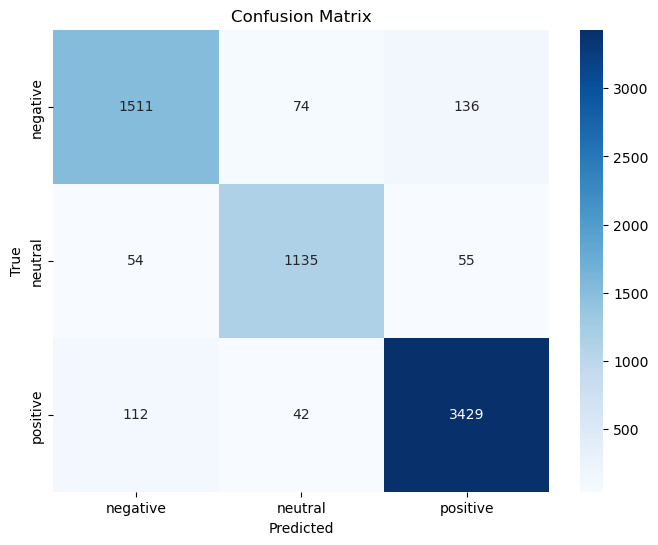

In [67]:
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test, svc_predictions)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [68]:
from sklearn.model_selection import cross_val_score

In [ ]:
svc_pipeline = make_pipeline(TfidfVectorizer(), SVC())
cv_scores = cross_val_score(svc_pipeline, X_train, y_train, cv=5, scoring='accuracy')

print("Cross-validation scores:", cv_scores)
print("Mean CV score:", cv_scores.mean())
print("Standard deviation of CV scores:", cv_scores.std())